In [1]:
# Outliers in target variable? 

#  It depends. If you have enough training data available, you can choose to discard the outliers. But usually, it would 
# be a good idea to look at the data and decide the cause of the outlier before taking any action.

# I believe dropping data is always a harsh step, and it should be taken only in extreme conditions when we’re sure that 
# the outlier is either a measurement/data entry error (it is not always known in the generic case though) or the artifact 
# to suboptimal sampling your training data

# Before removing the outliers attributable to the measurement/data entry error, try to correct the error if possible 
# (before you drop the respective outlier)

# If the extreme (outlier) value is a legitimate observation that is a natural part of the population you’re studying, 
# you should leave it in the training dataset

# Whenever you decide to remove outliers, it would be nice to document the excluded data points as well as explain your 
# reasoning. You must be able to attribute a specific cause for removing outliers.

# Another approach is to perform the analysis with and without these observations and discuss the differences. Comparing 
# results in this manner is particularly useful when you’re unsure about removing an outlier and when there is substantial 
# disagreement within a group over this question.

# Last but not least, there are some good statistical and ML algorithms that can handle outliers in data solidly. If you 
# decide to engage with one of such algorithms in your ML experiments down the road, you can soften your outlier removal / 
# data correcting approach.


In [2]:
# Importing the libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

%matplotlib inline

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

In [23]:
# Load the general dataset

HOutliers = pd.read_excel(r"C:\Users\Admin\Downloads\Raju Sir DLS\Predict_BMI.xlsx", header=0)
HOutliers.head()

,HeightM,Weightkg,Fat,BMI
0,1.60,49.44,23.9,19.31
1,1.65,62.60,28.8,22.96
2,1.65,75.75,32.4,27.79
3,1.53,48.99,25.8,20.92
4,1.45,43.09,22.5,20.38


In [24]:
# Display the dataset information

HOutliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   HeightM   92 non-null     float64
 1   Weightkg  92 non-null     float64
 2   Fat       92 non-null     float64
 3   BMI       92 non-null     float64
dtypes: float64(4)
memory usage: 3.0 KB


In [25]:
# Display the shape of the dataset

HOutliers.shape

(92, 4)

In [26]:
# Display "Descriptive Statistical Analysis"

HOutliers.describe()

,HeightM,Weightkg,Fat,BMI
count,92.000000,92.000000,92.000000,92.000000
mean,1.511522,47.865000,26.961957,20.705435
std,0.074035,13.077016,7.142888,4.325066
min,1.330000,29.260000,15.600000,14.990000
25%,1.460000,38.952500,21.075000,17.707500
50%,1.500000,45.475000,25.500000,19.480000
75%,1.570000,52.705000,31.975000,22.735000
max,1.660000,87.540000,46.000000,34.460000


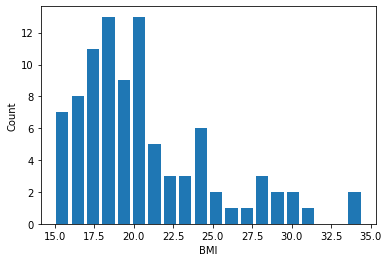

In [27]:
# Plot Histogram

plt.hist(HOutliers.BMI, bins=20, rwidth=0.8)
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

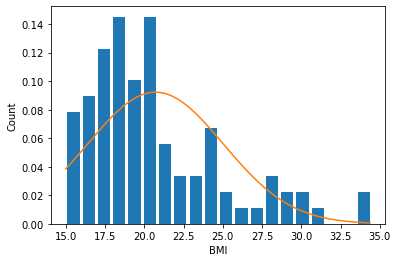

In [28]:
# Gaussian distribution (also known as normal distribution) is a bell-shaped curve

from scipy.stats import norm

plt.hist(HOutliers.BMI, bins=20, rwidth=0.8, density=True)
plt.xlabel('BMI')
plt.ylabel('Count')

rng = np.arange(HOutliers.BMI.min(), HOutliers.BMI.max(), 0.1)
plt.plot(rng, norm.pdf(rng, HOutliers.BMI.mean(),HOutliers.BMI.std()))

In [29]:
# Calculate the standard deviation

HOutliers.BMI.std()

4.325066070267999

In [30]:
# Calculat upper limit as  "Upper Limit = mean + 3 * std"

BMIupper_limit = round(HOutliers.BMI.mean() + 3 * HOutliers.BMI.std(),3)
BMIupper_limit

33.681

In [31]:
# Calculat Lower limit as "Lower Limit = mean - 3 * std" 

BMIlower_limit = round(HOutliers.BMI.mean() - 3 * HOutliers.BMI.std(), 3)
BMIlower_limit

7.73

In [32]:
#Upper Limit for Fat

Fatupper_limit = round(HOutliers.Fat.mean() + 3 * HOutliers.Fat.std(), 3)
Fatupper_limit



48.391

In [33]:
#Lower limit for Fat

Fatlower_limit = round(HOutliers.Fat.mean() - 3 * HOutliers.Fat.std(), 3)
Fatlower_limit

5.533

In [37]:
#Upper Limit for Weight

Wtupper_limit = round(HOutliers.Weightkg.mean() + 3 * HOutliers.Weightkg.std(), 3)
Wtupper_limit


87.096

In [38]:
#Lower limit for Weight

Wtlower_limit = round(HOutliers.Weightkg.mean() - 3 * HOutliers.Weightkg.std(), 3)
Wtlower_limit

8.634

In [39]:
#Upper Limit for Height

Htupper_limit = round(HOutliers.HeightM.mean() + 3 * HOutliers.HeightM.std(), 3)
Htupper_limit

1.734

In [40]:
#Lower limit for Weight

Htlower_limit = round(HOutliers.HeightM.mean() - 3 * HOutliers.HeightM.std(), 3)
Htlower_limit

1.289

In [41]:
# Display the outlier in the dataset

HOutliers[(HOutliers.BMI>upper_limit) | (HOutliers.BMI<lower_limit)]

,HeightM,Weightkg,Fat,BMI
56,1.59,87.54,38.0,34.46


In [42]:
# Eliminate the outlier and write data to new file

HOutliers_new = HOutliers[(HOutliers.BMI>lower_limit) & (HOutliers.BMI<upper_limit)]
HOutliers_new.head()

,HeightM,Weightkg,Fat,BMI
0,1.60,49.44,23.9,19.31
1,1.65,62.60,28.8,22.96
2,1.65,75.75,32.4,27.79
3,1.53,48.99,25.8,20.92
4,1.45,43.09,22.5,20.38


In [43]:
HOutliers_new.shape

(91, 4)

In [45]:
# Display the fat outlier in the dataset

HOutliers[(HOutliers.Fat>upper_limit) | (HOutliers.Fat<lower_limit)]

,HeightM,Weightkg,Fat,BMI
10,1.47,46.04,33.7,21.21
15,1.52,62.37,37.9,26.85
17,1.58,74.39,40.6,29.76
18,1.52,55.57,36.3,23.92
46,1.47,54.54,38.4,25.13
48,1.44,51.03,36.4,24.56
50,1.58,60.33,39.7,24.13
52,1.58,83.91,46.0,33.57
53,1.55,69.97,38.9,29.14
54,1.64,77.34,42.2,28.59


In [46]:
# Eliminate the outlier and write data to new file

HOutliers_new = HOutliers[(HOutliers.Fat>lower_limit) & (HOutliers.Fat<upper_limit)]
HOutliers_new.head()

,HeightM,Weightkg,Fat,BMI
0,1.60,49.44,23.9,19.31
1,1.65,62.60,28.8,22.96
2,1.65,75.75,32.4,27.79
3,1.53,48.99,25.8,20.92
4,1.45,43.09,22.5,20.38


In [47]:
HOutliers_new.shape

(74, 4)

In [48]:
# Display the weight outlier in the dataset

HOutliers[(HOutliers.Weightkg>upper_limit) | (HOutliers.Weightkg<lower_limit)]

,HeightM,Weightkg,Fat,BMI
0,1.60,49.44,23.9,19.31
1,1.65,62.60,28.8,22.96
2,1.65,75.75,32.4,27.79
3,1.53,48.99,25.8,20.92
4,1.45,43.09,22.5,20.38
...,...,...,...,...
86,1.49,41.62,24.5,18.69
87,1.49,39.01,23.3,17.52
88,1.60,41.28,20.1,16.12
89,1.42,38.10,30.3,18.83


In [49]:
# Eliminate the outlier and write data to new file

HOutliers_new = HOutliers[(HOutliers.Weightkg>lower_limit) & (HOutliers.Weightkg<upper_limit)]
HOutliers_new.head()

,HeightM,Weightkg,Fat,BMI
34,1.45,33.45,18.7,15.82
36,1.42,30.05,17.1,14.99
37,1.38,32.09,26.2,16.75
41,1.45,32.66,18.1,15.58
42,1.33,30.50,29.8,17.15


In [50]:
HOutliers_new.shape

(8, 4)

In [51]:
# Display the Height outlier in the dataset

HOutliers[(HOutliers.HeightM>upper_limit) | (HOutliers.HeightM<lower_limit)]

,HeightM,Weightkg,Fat,BMI
0,1.60,49.44,23.9,19.31
1,1.65,62.60,28.8,22.96
2,1.65,75.75,32.4,27.79
3,1.53,48.99,25.8,20.92
4,1.45,43.09,22.5,20.38
...,...,...,...,...
87,1.49,39.01,23.3,17.52
88,1.60,41.28,20.1,16.12
89,1.42,38.10,30.3,18.83
90,1.40,30.16,20.6,15.46


In [52]:
HOutliers_new.shape

(8, 4)

In [53]:
HOutliers.shape[0] - HOutliers_new.shape[0]

84

In [54]:
HOutliers.shape

(92, 4)

In [55]:
HOutliers_new.shape[0]

8